In [4]:
import pandas as pd
from pathlib import Path
"counterfactual_results/nf=300_fl=24_nt=10_nt=30_ne=5_kt=0.33_re=False_gemma-2-9b"
"counterfactual_results/nf=300_fl=32_nt=10_nt=30_ne=5_kt=0.5_re=False_gemma-2-9b/generations_scores.json"
kl_path_format = "counterfactual_results/nf={n_feats}_fl={feat_layer}_nt={n_train}_nt={n_test}_ne={n_explanations}_kt={kl_threshold}_re={random_explanations}_l={latents}_{model_last}"
zero_ablation_path_format = "counterfactual_results/nf={n_feats}_fl={feat_layer}_nt={n_train}_nt={n_test}_ne={n_explanations}_re={random_explanations}_l={latents}_za={zero_ablate}_{model_last}"

base_cfg = {
    "feat_layer": 32,
    "n_feats": 300,
    "n_train": 10,
    "n_test": 30,
    "n_explanations": 5,
    "kl_threshold": 1.0,
    "random_explanations": False,
    "model_last": "gemma-2-9b",
    "latents": "sae",
    "zero_ablate": False
}

# load all results
def load_result(cfg):
    if cfg["zero_ablate"]:
        path = zero_ablation_path_format.format(**cfg)
    else:
        path = kl_path_format.format(**cfg)
    
    path = Path(path) / "generations_scores.json"
    try:
        df = pd.read_json(path)
    except FileNotFoundError as e:
        # rename "generations.json" to "partial_generations.json"
        path = path.parent / "generations.json"
        if path.exists():
            path.rename(path.parent / "partial_generations.json")
            print(f"Renamed {path} to {path.parent / 'partial_generations.json'}")
        raise e
    df = df.sort_values(by="max_delta_conditional_entropy", ascending=False)
    return df
base_df = load_result(base_cfg)
base_df

FileNotFoundError: File counterfactual_results/nf=300_fl=32_nt=10_nt=30_ne=5_kt=1.0_re=False_l=sae_gemma-2-9b/generations_scores.json does not exist

In [5]:
base_df.iloc[0].completions

NameError: name 'base_df' is not defined

In [6]:
base_df.iloc[0].neuron_prompter


NameError: name 'base_df' is not defined

In [7]:
import matplotlib.pyplot as plt

cfg = base_cfg.copy()
case_cfg = base_cfg.copy()
# case_cfg["feat_layer"] = 41
case_cfg["latents"] = "random"

case_df = load_result(case_cfg)
cfg_df = load_result(cfg)

case_scores = case_df["max_delta_conditional_entropy"].values
cfg_scores = cfg_df["max_delta_conditional_entropy"].values

diff_keys = [k for k in case_cfg.keys() if case_cfg[k] != cfg[k]]


suptitle = " ".join([f"{k}={case_cfg[k]} ({cfg[k]})" for k in diff_keys])
title = " ".join([f"{k}={v}" for k, v in cfg.items()])
plt.hist(case_scores, bins=20, alpha=0.5, label="case", density=True)
plt.hist(cfg_scores, bins=20, alpha=0.5, label="control", density=True)
plt.suptitle(suptitle)
plt.title(title, fontsize=10)
plt.xlabel("max_delta_conditional_entropy")
plt.legend()
plt.show()



FileNotFoundError: File counterfactual_results/nf=300_fl=32_nt=10_nt=30_ne=5_kt=1.0_re=False_l=random_gemma-2-9b/generations_scores.json does not exist

In [8]:
import pandas as pd

import json
path = "counterfactual_results/gpaolo_l32_input_scores.json"
with open(path, "r") as f:
    data = json.load(f)

input_df = pd.DataFrame([{"feat_idx": int(k.split("feature")[-1]), "feat": k, "score": data[k]["score"], "explanations": data[k]["explanations"]} for k in data.keys()])
input_df.head()

,feat_idx,feat,score,explanations
0,226,.model.layers.32_feature226,0.965000,Temporal adverb indicating a future point in t...
1,41,.model.layers.32_feature41,0.964181,"Adverbial or existential ""there"" typically use..."
2,345,.model.layers.32_feature345,0.963727,"Hyperlinks and web references, often denoted a..."
3,285,.model.layers.32_feature285,0.963542,Interrogative sentences starting with the word...
4,85,.model.layers.32_feature85,0.959737,"Periods at the end of website URLs, publicatio..."


In [9]:
# plots I want:
# score vs layer at each KL thresh and zero-ablation (show avg kl div)
# "" for random sae
# "" for random explanations
# output score vs input score for l32, for each KL thresh and zero-ablation

File not found for {'feat_layer': 32, 'n_feats': 300, 'n_train': 10, 'n_test': 30, 'n_explanations': 5, 'kl_threshold': 0.33, 'random_explanations': False, 'model_last': 'gemma-2-9b', 'latents': 'sae', 'zero_ablate': False}: File counterfactual_results/nf=300_fl=32_nt=10_nt=30_ne=5_kt=0.33_re=False_l=sae_gemma-2-9b/generations_scores.json does not exist
File not found for {'feat_layer': 40, 'n_feats': 300, 'n_train': 10, 'n_test': 30, 'n_explanations': 5, 'kl_threshold': 0.33, 'random_explanations': False, 'model_last': 'gemma-2-9b', 'latents': 'sae', 'zero_ablate': False}: File counterfactual_results/nf=300_fl=40_nt=10_nt=30_ne=5_kt=0.33_re=False_l=sae_gemma-2-9b/generations_scores.json does not exist
File not found for {'feat_layer': 41, 'n_feats': 300, 'n_train': 10, 'n_test': 30, 'n_explanations': 5, 'kl_threshold': 0.33, 'random_explanations': False, 'model_last': 'gemma-2-9b', 'latents': 'sae', 'zero_ablate': False}: File counterfactual_results/nf=300_fl=41_nt=10_nt=30_ne=5_kt=0.

/home/alex/.conda/envs/autointerp/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/alex/.conda/envs/autointerp/lib/python3.11/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


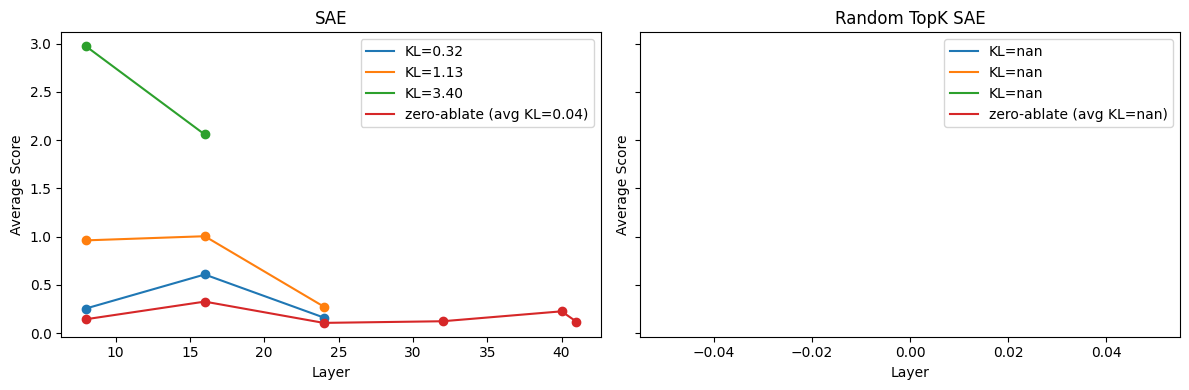

In [10]:
import numpy as np

# Score vs Layer at each KL threshold and zero-ablation
kl_thresholds = [0.33, 1.0, 3.0, None]
layers = [8, 16, 24, 32, 40, 41]

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for i, latents in enumerate(["sae", "random"]):
    plt.sca(axs[i])
    for kl in kl_thresholds:
        used_layers = []
        avg_scores = []
        avg_kls = []
        for feat_layer in layers:
            cfg = base_cfg.copy()
            cfg["feat_layer"] = feat_layer
            if kl is None:    
                cfg["zero_ablate"] = True
            else:
                cfg["kl_threshold"] = kl
            cfg["latents"] = latents
            cfg["random_explanations"] = False
            try:
                df = load_result(cfg)
            except FileNotFoundError as e:
                print(f"File not found for {cfg}: {e}")
                continue
            avg_kls.append(df['avg_kl'].values.mean())
            avg_scores.append(df['max_delta_conditional_entropy'].values.mean())
            used_layers.append(feat_layer)
        label = f"zero-ablate (avg KL={np.mean(avg_kls):.2f})" if kl is None else f"KL={np.mean(avg_kls):.2f}"
        plt.plot(used_layers, avg_scores, label=label)
        plt.scatter(used_layers, avg_scores)
    plt.xlabel('Layer')
    plt.ylabel('Average Score')
    plt.legend()
    plt.title("SAE" if latents == "sae" else "Random TopK SAE")
plt.tight_layout()
plt.show()

LinregressResult(slope=np.float64(-0.8972404452260677), intercept=np.float64(1.0373501075574736), rvalue=np.float64(-0.28458253186982885), pvalue=np.float64(2.9646437666686262e-05), stderr=np.float64(0.2100758873266564), intercept_stderr=np.float64(0.1596096438239074))


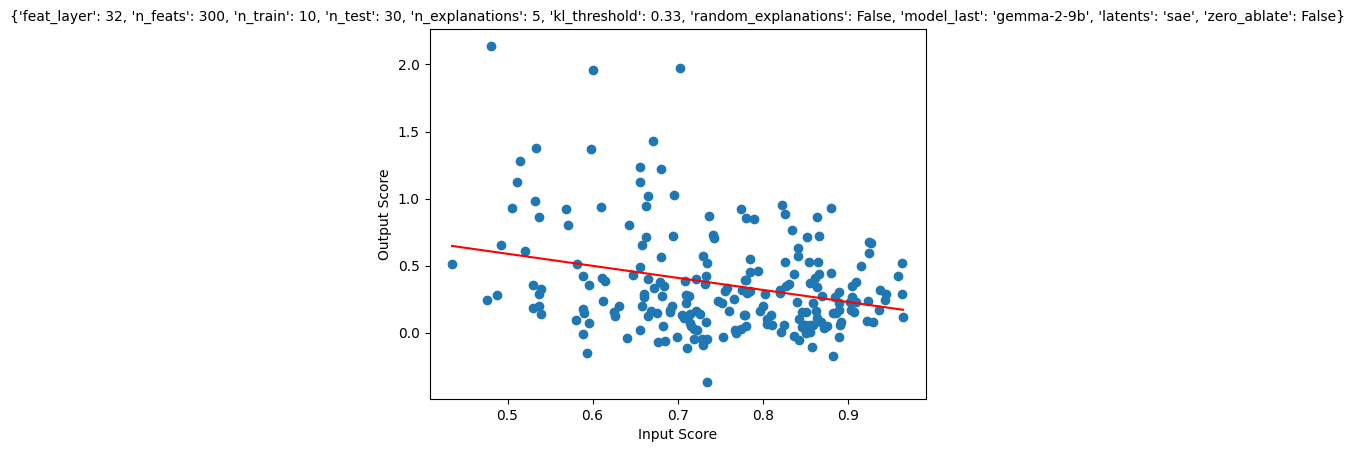

In [ ]:
from scipy.stats import linregress

kl_thresh = 0.33
cfg = base_cfg.copy()
if kl_thresh is None:
    cfg["zero_ablate"] = True
else:
    cfg["kl_threshold"] = kl_thresh
cfg
df = load_result(cfg)

joined_df = input_df.merge(df, on="feat_idx")

linr = linregress(joined_df["score"], joined_df["max_delta_conditional_entropy"])
print(linr)
plt.figure()
plt.title(cfg, fontsize=10)
plt.scatter(joined_df["score"], joined_df["max_delta_conditional_entropy"])
plt.plot(joined_df["score"], linr.intercept + linr.slope * joined_df["score"], color="red")
plt.xlabel("Input Score")
plt.ylabel("Output Score")
plt.show()
